In [55]:
# import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [6]:
# set main
main_directory = os.getcwd().strip('notebooks')

In [31]:
prop_df = pd.read_csv(main_directory+"data/curated/rental_population.csv")
income_df = pd.read_csv(main_directory+"data/curated/vic_income_by_sa2.csv")
# drop irrelevant columns
#prop_df = prop_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'index_right'])
income_df = income_df.drop(columns=['Unnamed: 0'])

In [30]:
prop_df

,index,name,cost_text,property_type,SA2 name,SA2 code_y,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019,pop_2020,pop_2021,Area,pop_density_2021
0,3531.0,20 Adrianus Street Alfredton VIC 3350,460.0,House,Alfredton,201011001,9060,9714,10338,11039,11852,12639,13520,14408,15472,16823,52.7,319.2
1,2993.0,66 Lugano Avenue Alfredton VIC 3350,440.0,House,Alfredton,201011001,9060,9714,10338,11039,11852,12639,13520,14408,15472,16823,52.7,319.2
2,2924.0,15 Nyon Road Alfredton VIC 3350,430.0,House,Alfredton,201011001,9060,9714,10338,11039,11852,12639,13520,14408,15472,16823,52.7,319.2
3,3589.0,33 Walters Way Alfredton VIC 3350,460.0,House,Alfredton,201011001,9060,9714,10338,11039,11852,12639,13520,14408,15472,16823,52.7,319.2
4,2953.0,52 Vale Street Alfredton VIC 3350,440.0,House,Alfredton,201011001,9060,9714,10338,11039,11852,12639,13520,14408,15472,16823,52.7,319.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,5407.0,27 Koroit Street Warrnambool VIC 3280,600.0,House,Warrnambool - South,217041480,13146,13157,13154,13150,13173,13192,13214,13247,13323,13292,120.2,110.6
6642,123.0,1 Princes Highway Warrnambool VIC 3280,212.0,Studio,Warrnambool - South,217041480,13146,13157,13154,13150,13173,13192,13214,13247,13323,13292,120.2,110.6
6643,1842.0,449 Raglan Parade Warrnambool VIC 3280,390.0,House,Warrnambool - South,217041480,13146,13157,13154,13150,13173,13192,13214,13247,13323,13292,120.2,110.6
6644,1562.0,238A Koroit Street Warrnambool VIC 3280,380.0,House,Warrnambool - South,217041480,13146,13157,13154,13150,13173,13192,13214,13247,13323,13292,120.2,110.6


In [25]:
income_df.loc[income_df['Earners 2019'] == 'np']

,SA2,SA2 NAME,Earners 2015,Earners 2016,Earners 2017,Earners 2018,Earners 2019,Median Age 2015,Median Age 2016,Median Age 2017,...,Median $ 2015,Median $ 2016,Median $ 2017,Median $ 2018,Median $ 2019,Mean $ 2015,Mean $ 2016,Mean $ 2017,Mean $ 2018,Mean $ 2019
82,205021083,Lake King,np,np,np,np,np,np,np,np,...,np,np,np,np,np,np,np,np,np,np


In [26]:
income_df = income_df.replace(['np'],'0')

#convert data types
convert_dic = {'Earners 2015': int, 
            'Earners 2016': int, 
            'Earners 2017': int, 
            'Earners 2018': int, 
            'Earners 2019': int, 
            'Mean $ 2015': int, 
            'Mean $ 2016': int, 
            'Mean $ 2017': int, 
            'Mean $ 2018': int, 
            'Mean $ 2019': int }

income_df = income_df.astype(convert_dic)

In [27]:
#extract lastest income data (2019)
income2019 = income_df[['SA2', 'SA2 NAME', 'Earners 2019', 'Median Age 2019', 'Mean $ 2019']]

convert_dic = {'Earners 2019': int, 
            'Median Age 2019': int, 
            'Mean $ 2019': int }

income2019 = income2019.astype(convert_dic)
income2019.dtypes

SA2                 int64
SA2 NAME           object
Earners 2019        int64
Median Age 2019     int64
Mean $ 2019         int64
dtype: object

In [28]:
# create monthly income by sa2
income2019['Mean Weekly $ 2019'] = income2019['Mean $ 2019']/52
income2019['Mean Weekly $ 2019'] = income2019['Mean Weekly $ 2019'].round(1)
income2019

,SA2,SA2 NAME,Earners 2019,Median Age 2019,Mean $ 2019,Mean Weekly $ 2019
0,201011001,Alfredton,7989,42,63668,1224.4
1,201011002,Ballarat,7595,47,77876,1497.6
2,201011003,Ballarat - North,13598,43,60367,1160.9
3,201011004,Ballarat - South,12722,40,50778,976.5
4,201011005,Buninyong,4249,46,63258,1216.5
...,...,...,...,...,...,...
457,217031476,Otway,2360,51,46448,893.2
458,217041477,Moyne - East,4081,46,55573,1068.7
459,217041478,Moyne - West,5852,48,55547,1068.2
460,217041479,Warrnambool - North,13157,43,56099,1078.8


In [34]:
rent_income_sa2 = pd.merge(prop_df, income2019, how='left', left_on=['SA2 code_y'], right_on=['SA2'])

In [35]:
rent_income_sa2.drop(['SA2', 'SA2 NAME'], axis=1)

,index,name,cost_text,property_type,SA2 name,SA2 code_y,pop_2012,pop_2013,pop_2014,pop_2015,...,pop_2018,pop_2019,pop_2020,pop_2021,Area,pop_density_2021,Earners 2019,Median Age 2019,Mean $ 2019,Mean Weekly $ 2019
0,3531.0,20 Adrianus Street Alfredton VIC 3350,460.0,House,Alfredton,201011001,9060,9714,10338,11039,...,13520,14408,15472,16823,52.7,319.2,7989.0,42.0,63668.0,1224.4
1,2993.0,66 Lugano Avenue Alfredton VIC 3350,440.0,House,Alfredton,201011001,9060,9714,10338,11039,...,13520,14408,15472,16823,52.7,319.2,7989.0,42.0,63668.0,1224.4
2,2924.0,15 Nyon Road Alfredton VIC 3350,430.0,House,Alfredton,201011001,9060,9714,10338,11039,...,13520,14408,15472,16823,52.7,319.2,7989.0,42.0,63668.0,1224.4
3,3589.0,33 Walters Way Alfredton VIC 3350,460.0,House,Alfredton,201011001,9060,9714,10338,11039,...,13520,14408,15472,16823,52.7,319.2,7989.0,42.0,63668.0,1224.4
4,2953.0,52 Vale Street Alfredton VIC 3350,440.0,House,Alfredton,201011001,9060,9714,10338,11039,...,13520,14408,15472,16823,52.7,319.2,7989.0,42.0,63668.0,1224.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,5407.0,27 Koroit Street Warrnambool VIC 3280,600.0,House,Warrnambool - South,217041480,13146,13157,13154,13150,...,13214,13247,13323,13292,120.2,110.6,8052.0,44.0,58247.0,1120.1
6642,123.0,1 Princes Highway Warrnambool VIC 3280,212.0,Studio,Warrnambool - South,217041480,13146,13157,13154,13150,...,13214,13247,13323,13292,120.2,110.6,8052.0,44.0,58247.0,1120.1
6643,1842.0,449 Raglan Parade Warrnambool VIC 3280,390.0,House,Warrnambool - South,217041480,13146,13157,13154,13150,...,13214,13247,13323,13292,120.2,110.6,8052.0,44.0,58247.0,1120.1
6644,1562.0,238A Koroit Street Warrnambool VIC 3280,380.0,House,Warrnambool - South,217041480,13146,13157,13154,13150,...,13214,13247,13323,13292,120.2,110.6,8052.0,44.0,58247.0,1120.1


In [37]:
rent_income_sa2 = rent_income_sa2.rename({'Mean Weekly $ 2019': 'weekly_income'}, axis=1)

In [38]:
rent_income_sa2['num_property_type'] = rent_income_sa2['property_type']
rent_income_sa2['num_property_type'].replace(['House', 'Apartment / Unit / Flat', 'Studio', 'Semi-Detached',
       'Townhouse', 'Villa', 'Terrace', 'New Apartments / Off the Plan',
       'Acreage / Semi-Rural', 'Duplex', 'Rural'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

## <font color='brown'>Visualization</font>

In [39]:
# create agg income by sa2
earner_df = income_df[['Earners 2015', 'Earners 2016', 'Earners 2017', 'Earners 2018', 'Earners 2019']]
mean_income_df = income_df[['Mean $ 2015', 'Mean $ 2016', 'Mean $ 2017', 'Mean $ 2018', 'Mean $ 2019']]
earner_df = earner_df.mean().reset_index()
mean_income_df = mean_income_df.mean().reset_index()

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_12917/1743631275.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  earner_df = earner_df.mean().reset_index()
/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_12917/1743631275.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_income_df = mean_income_df.mean().reset_index()


Text(0.5, 1.0, 'Correlation Between Income by SA2 and Rental Price')

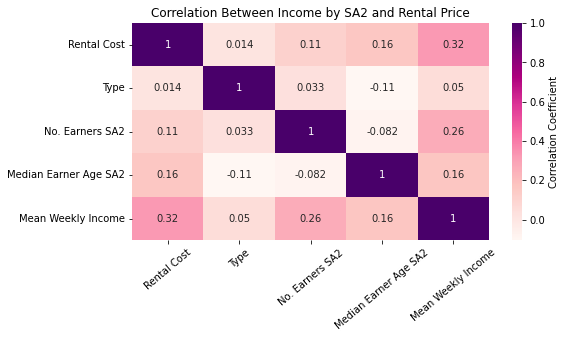

In [40]:
col_name = ['cost_text', 'num_property_type', 'Earners 2019', 'Median Age 2019', 'weekly_income']
label = ['Rental Cost', 'Type', 'No. Earners SA2', 'Median Earner Age SA2', 'Mean Weekly Income']
corr_matrix = rent_income_sa2[col_name].corr()

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap = "RdPu", annot=True, ax=ax, cbar_kws={'label': 'Correlation Coefficient'})
ax.set_xticklabels(label, rotation = 40)
ax.set_yticklabels(label)
ax.set_title("Correlation Between Income by SA2 and Rental Price")


### Scatter plot

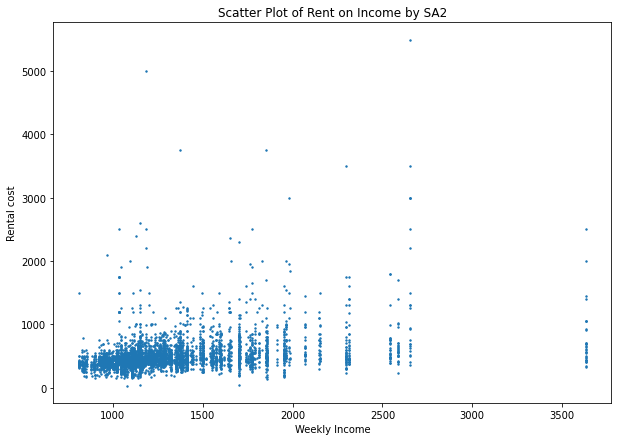

In [41]:
rent_income_sa2.plot(x="weekly_income", y=["cost_text"], kind = 'scatter', s=2\
    , figsize=(10,7), ylabel = 'Rental cost', xlabel = 'Weekly Income', title = 'Scatter Plot of Rent on Income by SA2')
plt.show()

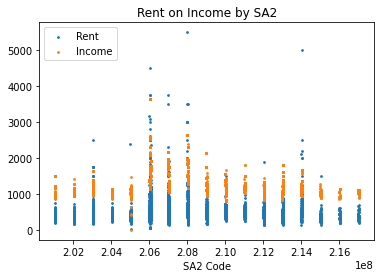

In [44]:
plt.scatter(rent_income_sa2['SA2 code_y'], rent_income_sa2['cost_text'], s=3, label='Rent')
plt.scatter(rent_income_sa2['SA2 code_y'], rent_income_sa2['weekly_income'], s=3, label='Income')
plt.xlabel('SA2 Code')
plt.title('Rent on Income by SA2')
plt.legend()

### Line Plot

In [48]:
# aggregate df to get mean rental cost and income of SA2
rent_sa2 = rent_income_sa2[['SA2 code_y', 'cost_text', 'weekly_income']]
mean_rent_income_sa2 = rent_sa2.groupby(['SA2 code_y']).mean().reset_index()
mean_rent_income_sa2


,SA2 code_y,cost_text,weekly_income
0,201011001,423.421053,1224.4
1,201011002,398.928571,1497.6
2,201011005,410.000000,1216.5
3,201011006,440.000000,1054.7
4,201011007,NaN,1148.8
...,...,...,...
517,217031476,395.000000,893.2
518,217041477,300.000000,1068.7
519,217041478,NaN,1068.2
520,217041479,367.142857,1078.8


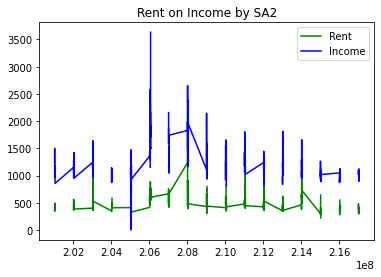

In [50]:
# plot using line graph to show trends
plt.plot(mean_rent_income_sa2['SA2 code_y'], mean_rent_income_sa2['cost_text'], 'g', label='Rent')
plt.plot(mean_rent_income_sa2['SA2 code_y'], mean_rent_income_sa2['weekly_income'], 'b', label='Income')
plt.title('Rent on Income by SA2')
plt.legend()

## <font color='brown'>Primary Modelling</font>

In [56]:
# generate a simple linear model
fit_OLS = ols(
   formula = "cost_text ~  weekly_income",
   data = rent_income_sa2
).fit()

In [57]:
# check the fit of the model
fit_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              cost_text   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     522.1
Date:                Sun, 02 Oct 2022   Prob (F-statistic):          2.10e-109
Time:                        17:23:29   Log-Likelihood:                -31402.
No. Observations:                4484   AIC:                         6.281e+04
Df Residuals:                    4482   BIC:                         6.282e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       209.2566     13.614     15.370      0.000     182.566     235.947
weekly_income     0.2231      0.010     22.850      0.000       0.204       0.242
==============================================================================
Omnibus:                     5198.373   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           845347.884
Skew:                           5.876   Prob(JB):                         0.00
Kurtosis:                      69.231   Cond. No.                     4.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""